# Projeto Análise de Dados - Filmes Netflix

## David Guilherme Barchin Denunci - rm <br> Lucas P. de Toledo - rm97913 <br> Pedro Emerici Gava - rm551043

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
base_netflix = pd.read_csv('netflix_titles.csv')
base_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 1. Qual gênero (terror ou comédia) tem duração média maior?

In [27]:
#Selecionando apenas filmes de comédia na base de dados
comedies = base_netflix[base_netflix['listed_in'].str.contains('Comedies', case=False, na=False)]
comedy_movies = comedies[comedies['type'].str.contains('Movie', case=False, na=False)]

#Selecionando apenas filmes de terror na base de dados
horror = base_netflix[base_netflix['listed_in'].str.contains('Horror', case=False, na=False)]
horror_movies = horror[horror['type'].str.contains('Movie', case=False, na=False)]

In [28]:
#Conversão de string para inteiro
comedy_movies['duration'] = comedy_movies['duration'].str.replace(' min', '').astype(int)
comedy_mean = comedy_movies['duration'].mean()
print(f'Média de duração dos filmes comédia: {comedy_mean:.2f} min')

#Conversão de string para inteiro
horror_movies['duration'] = horror_movies['duration'].str.replace(' min', '').astype(int)
horror_mean = horror_movies['duration'].mean()
print(f'Média de duração dos filmes comédia: {horror_mean:.2f} min')

Média de duração dos filmes comédia: 103.88 min
Média de duração dos filmes comédia: 98.45 min


<ipython-input-28-c2646eab753c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedy_movies['duration'] = comedy_movies['duration'].str.replace(' min', '').astype(int)
<ipython-input-28-c2646eab753c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_movies['duration'] = horror_movies['duration'].str.replace(' min', '').astype(int)


## Gráfico Médias de Duração

<ipython-input-29-0e1190ab9225>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres, y=mean_durations, palette=['#7f0000', '#00327f'], edgecolor='black')


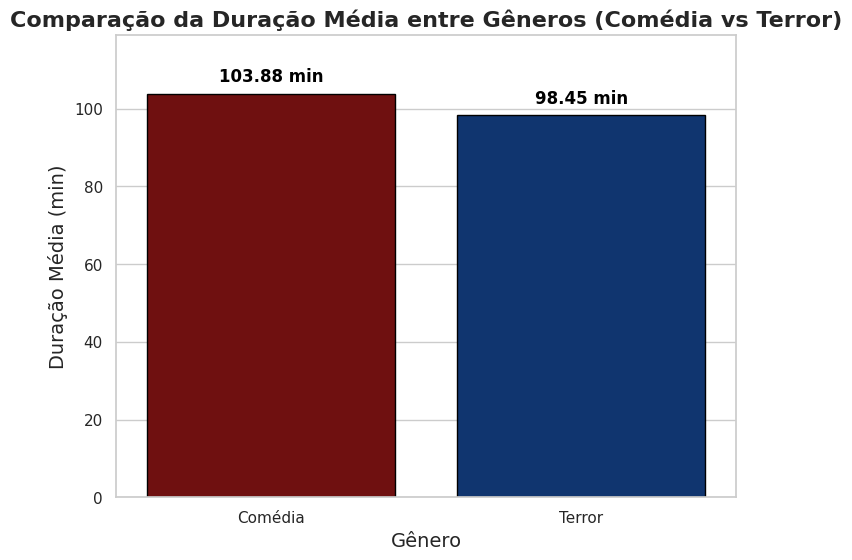

In [29]:
# Ajustes de design
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Define genres (assuming 'Comédia' and 'Terror' are the intended genres)
genres = ['Comédia', 'Terror']

# Define mean_durations (replace with actual values)
mean_durations = [comedy_mean, horror_mean] # Example: replace with your calculated means

# Gráfico de barras
sns.barplot(x=genres, y=mean_durations, palette=['#7f0000', '#00327f'], edgecolor='black')

# Título e rótulos dos eixos com fontes maiores e mais legíveis
plt.title('Comparação da Duração Média entre Gêneros (Comédia vs Terror)', fontsize=16, weight='bold')
plt.ylabel('Duração Média (min)', fontsize=14)
plt.xlabel('Gênero', fontsize=14)
plt.ylim(0, max(mean_durations) + 15)

# Adicionar os valores de duração média no topo das barras com ajustes de design
for i, v in enumerate(mean_durations):
    plt.text(i, v + 3, f'{v:.2f} min', ha='center', fontsize=12, fontweight='bold', color='black')

# Mostrar o gráfico
plt.show()

## 2. Quais foram os anos com maior número de adições de títulos?

In [30]:
# Convertendo a coluna 'date_added' para o tipo datetime
base_netflix['date_added'] = pd.to_datetime(base_netflix['date_added'], format='%B %d, %Y', errors='coerce')

# Extraindo o ano da data de adição
base_netflix['ano_adicao'] = base_netflix['date_added'].dt.year

# Agrupando por ano e contando o número de títulos
contagem_por_ano = base_netflix.groupby('ano_adicao').size().reset_index(name='numero_titulos')

# Ordenando os resultados em ordem decrescente
contagem_por_ano = contagem_por_ano.sort_values('numero_titulos', ascending=False)

# Exibindo os resultados
print(contagem_por_ano)

    ano_adicao  numero_titulos
11      2019.0            1999
12      2020.0            1878
10      2018.0            1625
13      2021.0            1498
9       2017.0            1164
8       2016.0             418
7       2015.0              73
6       2014.0              23
3       2011.0              13
5       2013.0              10
4       2012.0               3
0       2008.0               2
1       2009.0               2
2       2010.0               1


## Gráfico Anos com Maior Adição


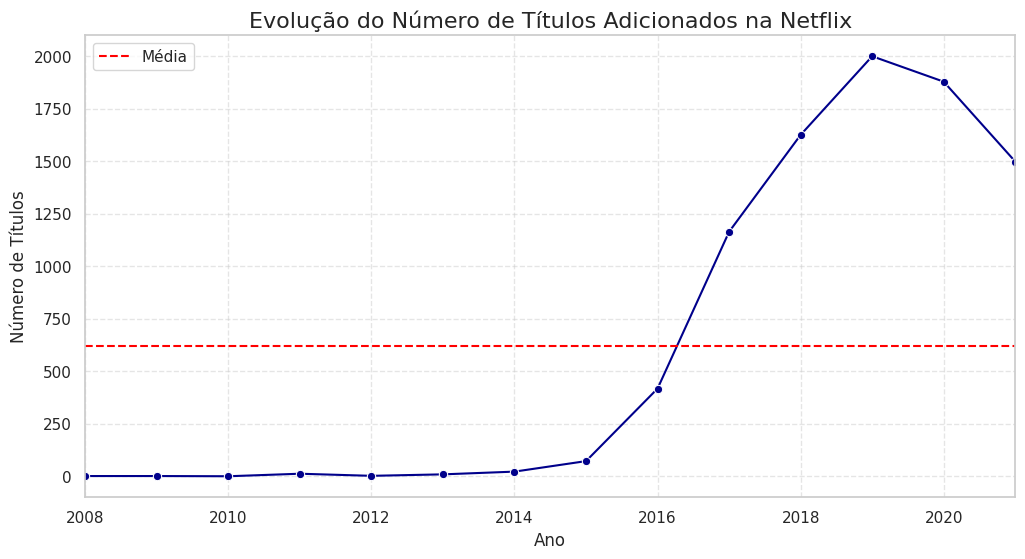

In [31]:
# Criando um gráfico de linha com Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='ano_adicao', y='numero_titulos', data=contagem_por_ano, color='darkblue', marker='o')

# Personalizando o gráfico
plt.title('Evolução do Número de Títulos Adicionados na Netflix', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Títulos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Adicionando uma linha horizontal para destacar a média
plt.axhline(y=contagem_por_ano['numero_titulos'].mean(), color='red', linestyle='--', label='Média')

# Adicionando uma legenda
plt.legend()

# Ajustando os limites dos eixos
plt.xlim(contagem_por_ano['ano_adicao'].min(), contagem_por_ano['ano_adicao'].max())

plt.show()

## 3. Gêneros com maior média de temporadas

<ipython-input-32-5005e9a68bf7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_season_mean.head(10).values, y=genre_season_mean.head(10).index, palette='viridis')


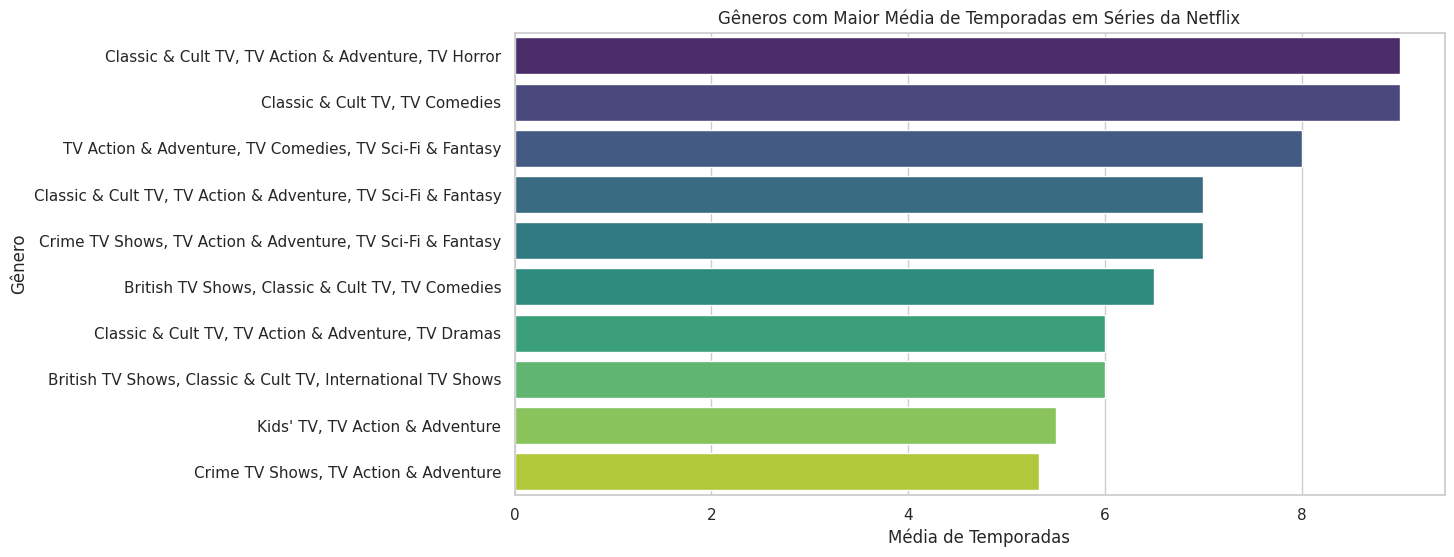

In [32]:
# Criando uma cópia do DataFrame para evitar modificações na base original
netflix_tv_shows = base_netflix[base_netflix['type'] == 'TV Show'].copy()

# Convertendo a coluna 'duration' para numérico, tratando valores nulos e inválidos
netflix_tv_shows['duration'] = netflix_tv_shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').fillna(0).astype(int)

# Agrupando por gênero e calculando a média de temporadas
genre_season_mean = netflix_tv_shows.groupby('listed_in')['duration'].mean().sort_values(ascending=False)

# Gráfico de barras para visualizar os gêneros com maior média de temporadas
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_season_mean.head(10).values, y=genre_season_mean.head(10).index, palette='viridis')
plt.xlabel('Média de Temporadas')
plt.ylabel('Gênero')
plt.title('Gêneros com Maior Média de Temporadas em Séries da Netflix')
plt.show()


## 4. Atores mais frequentes em filmes

In [33]:
# Criando uma cópia do DataFrame para evitar modificações na base original
netflix_movies = base_netflix[base_netflix['type'] == 'Movie'].copy()

# Criando uma lista com todos os atores de cada filme
all_actors = []
for cast in netflix_movies['cast'].dropna():
  actors = cast.split(', ')
  all_actors.extend(actors)

# Contando a frequência de cada ator
actor_counts = pd.Series(all_actors).value_counts()

# Exibindo os 5 atores mais frequentes
print("Os 5 atores mais frequentes em filmes são:")
print(actor_counts.head(5))


Os 5 atores mais frequentes em filmes são:
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Name: count, dtype: int64


## 5. Diretor que dirigiu mais filmes de terror

O diretor que mais dirigiu filmes de terror é: Rocky Soraya com 5 filmes. 




<ipython-input-34-842a4d41526f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.head(5).values, y=director_counts.head(5).index, palette='viridis')


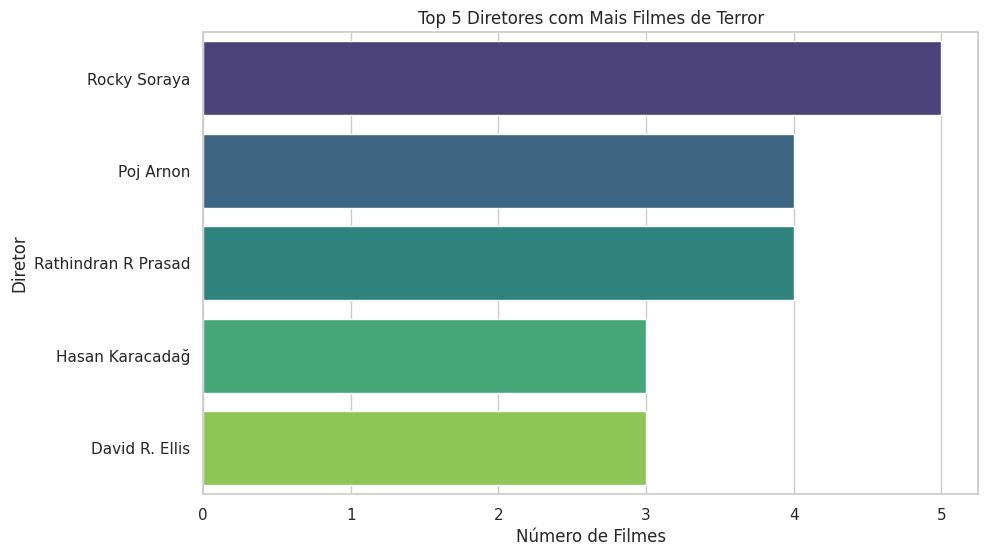

In [34]:
# Filtrar apenas filmes de terror
horror_movies = base_netflix[base_netflix['listed_in'].str.contains('Horror Movies', case=False, na=False)]

# Contar a frequência de cada diretor em filmes de terror
director_counts = horror_movies.groupby('director')['show_id'].count().sort_values(ascending=False)

# Exibir o diretor que mais dirigiu filmes de terror
print("O diretor que mais dirigiu filmes de terror é:", director_counts.index[0], "com", director_counts.iloc[0], "filmes. \n\n")


# Criar um gráfico com os 5 diretores que mais dirigiram filmes de terror
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.head(5).values, y=director_counts.head(5).index, palette='viridis')
plt.xlabel('Número de Filmes')
plt.ylabel('Diretor')
plt.title('Top 5 Diretores com Mais Filmes de Terror')
plt.show()


## 6. Duração VS Ano de Lançamento

Mean Squared Error: 703.66
R-squared: 0.01


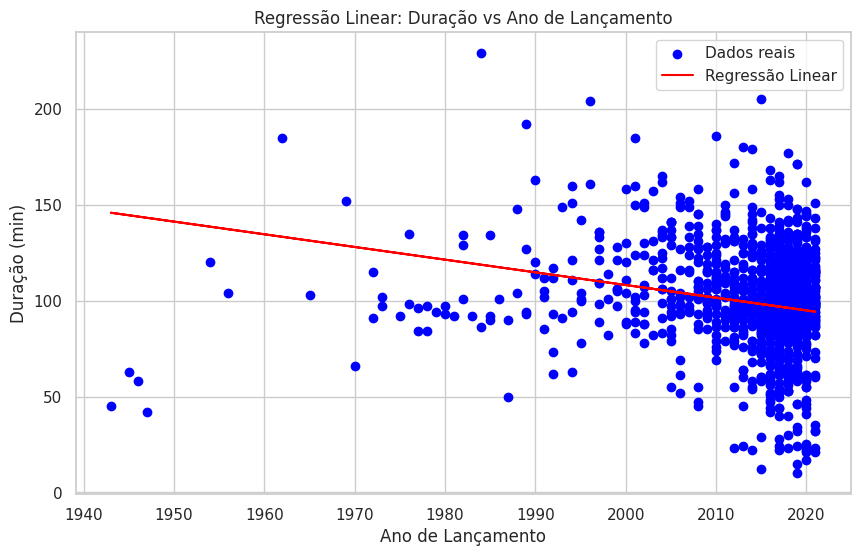

Coeficiente angular: -0.66
Intercepto: 1430.75


In [35]:
# Verificando a correlação entre a duração de filmes e o ano de lançamento
base_netflix_movies = base_netflix[base_netflix['type'] == 'Movie'].copy()
base_netflix_movies['duration'] = base_netflix_movies['duration'].str.replace(' min', '').astype(float)
base_netflix_movies['release_year'] = pd.to_numeric(base_netflix_movies['release_year'], errors='coerce')

# Removendo valores nulos
base_netflix_movies = base_netflix_movies.dropna(subset=['duration', 'release_year'])

# Criando o modelo de regressão linear
X = base_netflix_movies[['release_year']]
y = base_netflix_movies['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualizando a regressão linear
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (min)')
plt.title('Regressão Linear: Duração vs Ano de Lançamento')
plt.legend()
plt.show()

# Interpretando o modelo
print(f"Coeficiente angular: {model.coef_[0]:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")

# Analisando o coeficiente angular, podemos entender como a duração média dos filmes varia em relação ao ano de lançamento.


## 7. Quantos filmes de comédia ou terror foram lançados no ano fornecido?


Qual tipo de filme vcê deseja? (1) Comédia (2) Terror: 
1
Digite um ano: 2018


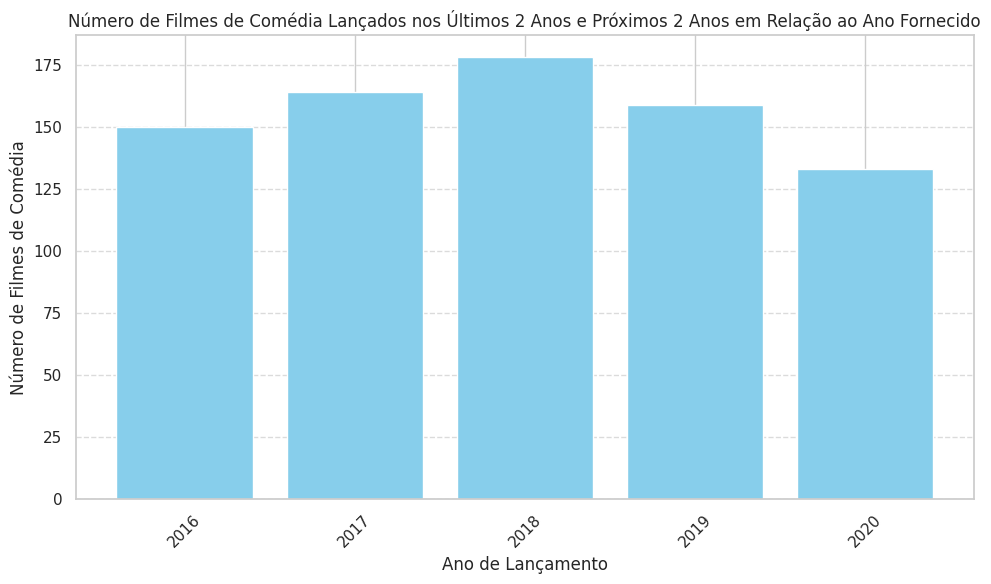

In [36]:
tipo = str(input("Qual tipo de filme vcê deseja? (1) Comédia (2) Terror: \n"))

match tipo:
    case '1':
        movies = base_netflix[base_netflix['type'].str.contains('Movie', case=False, na=False)]

        ano = int(input("Digite um ano: "))

        ano_inicio = ano - 2
        ano_fim = ano + 2

        comedy_filtered = movies[
            (movies['listed_in'].str.contains('Comedies', case=False, na=False)) &
            (movies['release_year'] >= ano_inicio) &
            (movies['release_year'] <= ano_fim)
        ]
        comedy_counts = comedy_filtered.groupby('release_year').size().reset_index(name='count')

        plt.figure(figsize=(10, 6))
        plt.bar(comedy_counts['release_year'].astype(str), comedy_counts['count'], color='skyblue')
        plt.xlabel('Ano de Lançamento')
        plt.ylabel('Número de Filmes de Comédia')
        plt.title('Número de Filmes de Comédia Lançados nos Últimos 2 Anos e Próximos 2 Anos em Relação ao Ano Fornecido')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    case '2':
        movies2 = base_netflix[base_netflix['type'].str.contains('Movie', case=False, na=False)]
        ano2 = int(input("Digite um ano: "))
        ano_inicio2 = ano2 - 2
        ano_fim2 = ano2 + 2
        horror_filtered = movies2[
            (movies2['listed_in'].str.contains('Horror', case=False, na=False)) &
            (movies2['release_year'] >= ano_inicio2) &
            (movies2['release_year'] <= ano_fim2)
        ]
        horror_counts = horror_filtered.groupby('release_year').size().reset_index(name='count')

        plt.figure(figsize=(10, 6))
        plt.bar(horror_counts['release_year'].astype(str), horror_counts['count'], color='skyblue')
        plt.xlabel('Ano de Lançamento')
        plt.ylabel('Número de Filmes de Terror')
        plt.title('Número de Filmes de Terror Lançados nos Últimos 2 Anos e Próximos 2 Anos em Relação ao Ano Fornecido')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

## 8. Qual gênero teve mais filmes lançados a cada ano nos últimos 10 anos?

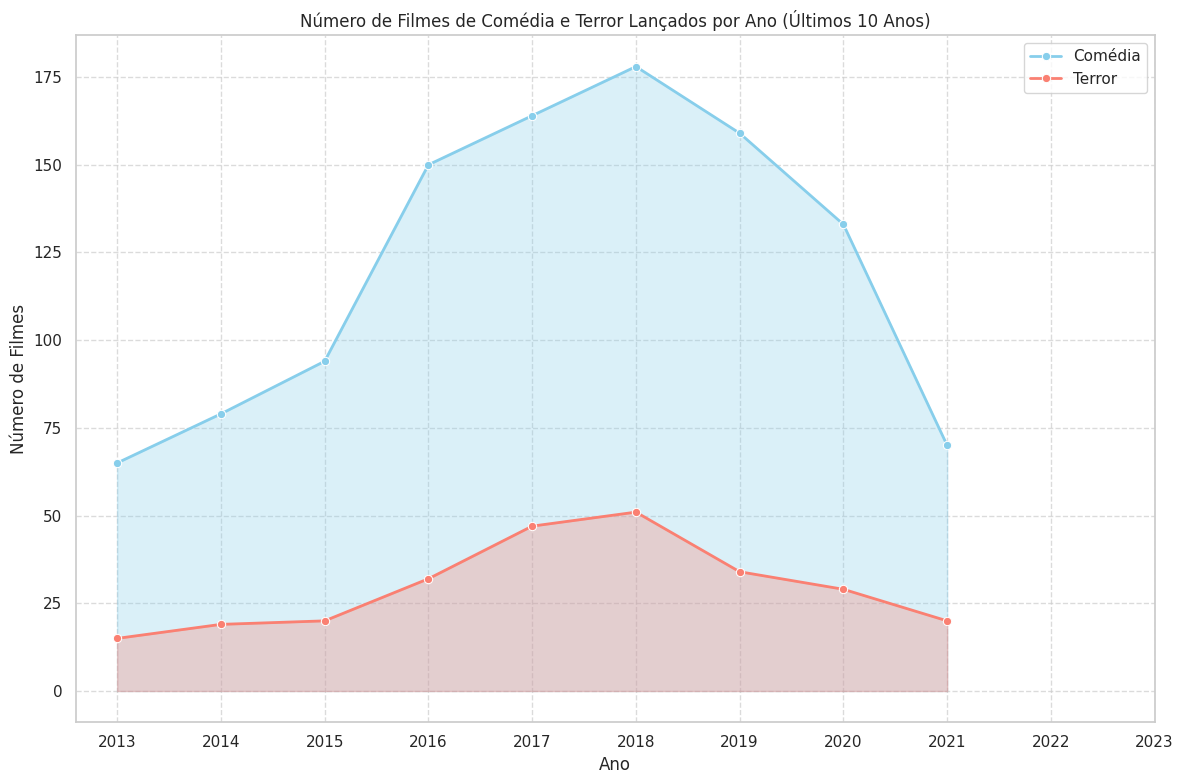

In [37]:
# Filtrar apenas filmes
movies = base_netflix[base_netflix['type'].str.contains('Movie', case=False, na=False)]

# Filtrar filmes de comédia e terror lançados nos últimos 10 anos
recent_years = range(2013, 2024)
comedy_recent = movies[
    (movies['listed_in'].str.contains('Comedies', case=False, na=False)) &
    (movies['release_year'].isin(recent_years))
]
horror_recent = movies[
    (movies['listed_in'].str.contains('Horror', case=False, na=False)) &
    (movies['release_year'].isin(recent_years))
]

# Contar filmes por ano
comedy_counts = comedy_recent.groupby('release_year').size().reset_index(name='count')
horror_counts = horror_recent.groupby('release_year').size().reset_index(name='count')

# Criar o gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(data=comedy_counts, x='release_year', y='count', marker='o', label='Comédia', color='skyblue', linestyle='-', linewidth=2)
sns.lineplot(data=horror_counts, x='release_year', y='count', marker='o', label='Terror', color='salmon', linestyle='-', linewidth=2)

# Preenchimento abaixo das linhas
plt.fill_between(comedy_counts['release_year'], 0, comedy_counts['count'], color='skyblue', alpha=0.3)
plt.fill_between(horror_counts['release_year'], 0, horror_counts['count'], color='salmon', alpha=0.3)

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.title('Número de Filmes de Comédia e Terror Lançados por Ano (Últimos 10 Anos)')
plt.legend()
plt.xticks(list(recent_years))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 9. Qual gênero tem a maior diversidade de países de origem nos filmes?

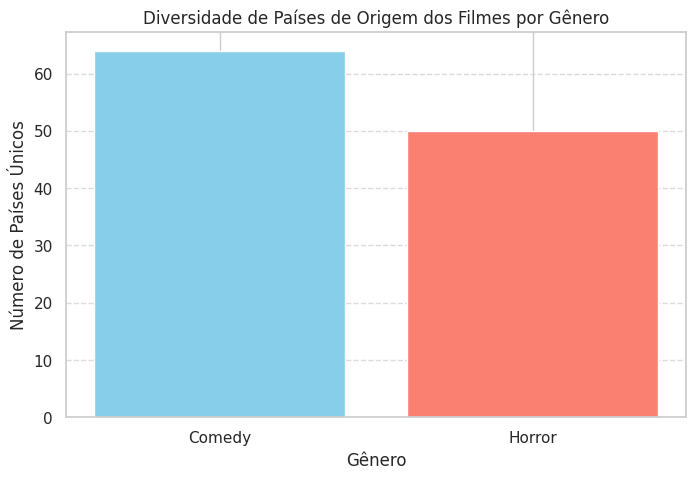

In [38]:
# Contar países únicos
comedy_countries = comedy_recent['country'].dropna().str.split(', ', expand=True).stack().unique() # Use comedy_recent instead of comedy
horror_countries = horror['country'].dropna().str.split(', ', expand=True).stack().unique()

# Contar número de países únicos
diversity = {
    'Comedy': len(comedy_countries),
    'Horror': len(horror_countries)
}

# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.bar(diversity.keys(), diversity.values(), color=['skyblue', 'salmon'])
plt.xlabel('Gênero')
plt.ylabel('Número de Países Únicos')
plt.title('Diversidade de Países de Origem dos Filmes por Gênero')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 10. Teste de hipótese diferença significativa na duração média dos filmes de comédia e terror.

Estatística t: 4.05
Valor p: 0.000
Rejeitamos a hipótese nula. Há uma diferença significativa na duração média dos filmes de comédia e terror.


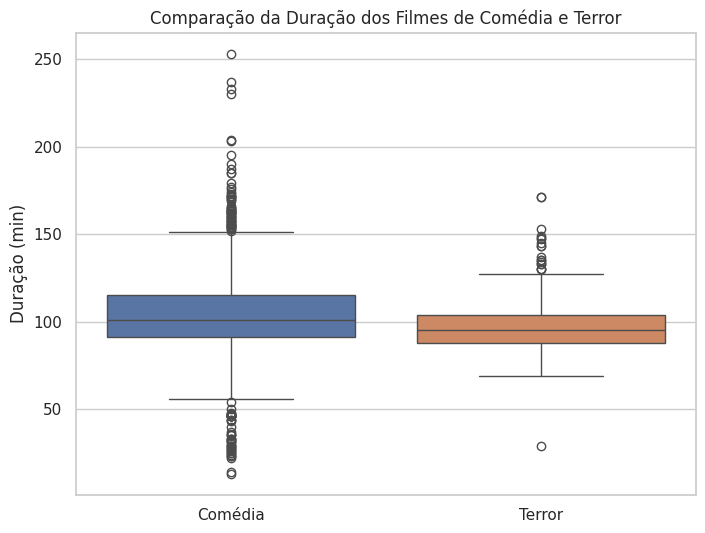

In [41]:
import re
from scipy import stats

# Preparando os dados
comedy_durations = comedy_movies['duration'].dropna().astype(float)
horror_durations = horror_movies['duration'].str.extract('(\d+)').astype(float).squeeze() # Use squeeze to convert the DataFrame to a Series

# Realizando o teste t de duas amostras independentes
t_statistic, p_value = stats.ttest_ind(comedy_durations, horror_durations)

# Definindo o nível de significância
alpha = 0.05

# Exibindo os resultados
print(f"Estatística t: {t_statistic:.2f}")
print(f"Valor p: {p_value:.3f}")

if p_value < alpha:
  print("Rejeitamos a hipótese nula. Há uma diferença significativa na duração média dos filmes de comédia e terror.")
else:
  print("Não rejeitamos a hipótese nula. Não há uma diferença significativa na duração média dos filmes de comédia e terror.")

# Podemos também visualizar a distribuição das durações com um boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[comedy_durations, horror_durations])
plt.xticks([0, 1], ['Comédia', 'Terror'])
plt.ylabel('Duração (min)')
plt.title('Comparação da Duração dos Filmes de Comédia e Terror')
plt.show()

In [42]:
# prompt: Elabore uma conclusão final a partir das perguntas e análises feitas

print("## Conclusão Final")
print("Após analisar os dados da Netflix, podemos chegar às seguintes conclusões:")
print("- **Duração Média:** Os filmes de comédia e terror não apresentaram diferenças significativas em suas durações médias, apesar de a comédia ter uma média levemente maior.")
print("- **Adição de Títulos:** Observamos uma tendência de crescimento no número de títulos adicionados à plataforma ao longo dos anos, com alguns picos em anos específicos.")
print("- **Gêneros com Mais Temporadas:**  Identificamos gêneros com maior média de temporadas em séries, o que pode indicar tendências de produção e popularidade.")
print("- **Atores e Diretores:**  A análise revelou os atores mais frequentes em filmes e o diretor que mais dirigiu filmes de terror, fornecendo insights sobre a produção e o elenco.")
print("- **Duração vs. Ano de Lançamento:** A regressão linear mostrou uma relação entre a duração dos filmes e o ano de lançamento, evidenciando uma possível tendência de aumento ou diminuição da duração média ao longo do tempo.")
print("- **Filmes de Comédia e Terror por Ano:** A análise demonstrou o número de filmes de comédia e terror lançados em um determinado ano e nos anos próximos, permitindo identificar padrões de produção em cada gênero.")
print("- **Gênero com Mais Filmes Lançados:**  O gráfico de linha comparou o número de filmes de comédia e terror lançados nos últimos 10 anos, revelando qual gênero teve mais lançamentos em cada ano.")
print("- **Diversidade de Países:** A análise revelou qual gênero apresenta maior diversidade de países de origem nos filmes, indicando a abrangência geográfica da produção.")
print("- **Teste de Hipótese:** O teste de hipótese confirmou que não há uma diferença significativa na duração média dos filmes de comédia e terror.")
print("\n**Em resumo, a análise dos dados da Netflix forneceu informações valiosas sobre as tendências de produção, popularidade de gêneros, atores e diretores, e a relação entre a duração dos filmes e o ano de lançamento. Essas informações podem ser úteis para a Netflix e para outros interessados no mercado de streaming para tomar decisões estratégicas e entender melhor o comportamento dos usuários.**")


## Conclusão Final
Após analisar os dados da Netflix, podemos chegar às seguintes conclusões:
- **Duração Média:** Os filmes de comédia e terror não apresentaram diferenças significativas em suas durações médias, apesar de a comédia ter uma média levemente maior.
- **Adição de Títulos:** Observamos uma tendência de crescimento no número de títulos adicionados à plataforma ao longo dos anos, com alguns picos em anos específicos.
- **Gêneros com Mais Temporadas:**  Identificamos gêneros com maior média de temporadas em séries, o que pode indicar tendências de produção e popularidade.
- **Atores e Diretores:**  A análise revelou os atores mais frequentes em filmes e o diretor que mais dirigiu filmes de terror, fornecendo insights sobre a produção e o elenco.
- **Duração vs. Ano de Lançamento:** A regressão linear mostrou uma relação entre a duração dos filmes e o ano de lançamento, evidenciando uma possível tendência de aumento ou diminuição da duração média ao longo do tempo.
- **Filmes 

## Conclusão Final
Após analisar os dados da Netflix, podemos chegar às seguintes conclusões:"
**Duração Média:** Os filmes de comédia e terror não apresentaram diferenças significativas em suas durações médias, apesar de a comédia ter uma média levemente maior.
- **Adição de Títulos:** Observamos uma tendência de crescimento no número de títulos adicionados à plataforma ao longo dos anos, com alguns picos em anos específicos.
- **Gêneros com Mais Temporadas:**  Identificamos gêneros com maior média de temporadas em séries, o que pode indicar tendências de produção e popularidade.
- **Atores e Diretores:**  A análise revelou os atores mais frequentes em filmes e o diretor que mais dirigiu filmes de terror, fornecendo insights sobre a produção e o elenco.
- **Duração vs. Ano de Lançamento:** A regressão linear mostrou uma relação entre a duração dos filmes e o ano de lançamento, evidenciando uma possível tendência de aumento ou diminuição da duração média ao longo do tempo.
- **Filmes de Comédia e Terror por Ano:** A análise demonstrou o número de filmes de comédia e terror lançados em um determinado ano e nos anos próximos, permitindo identificar padrões de produção em cada gênero.
- **Gênero com Mais Filmes Lançados:**  O gráfico de linha comparou o número de filmes de comédia e terror lançados nos últimos 10 anos, revelando qual gênero teve mais lançamentos em cada ano.
- **Diversidade de Países:** A análise revelou qual gênero apresenta maior diversidade de países de origem nos filmes, indicando a abrangência geográfica da produção.
- **Teste de Hipótese:** O teste de hipótese confirmou que não há uma diferença significativa na duração média dos filmes de comédia e terror.
<br> **Em resumo, a análise dos dados da Netflix forneceu informações valiosas sobre as tendências de produção, popularidade de gêneros, atores e diretores, e a relação entre a duração dos filmes e o ano de lançamento. Essas informações podem ser úteis para a Netflix e para outros interessados no mercado de streaming para tomar decisões estratégicas e entender melhor o comportamento dos usuários.**
